# Understanding principal component analysis 

In this post, we'll take a deep dive into PCA, from both a mathematical and implementation perspective.
We'll derive the equation from the ground up, look at how we can compute it and finally end with what it can be used for. This post is primarily targeted at those with a basic understanding of PCA but want to know the assumptions it relies on, its properties and derive how it can be computed.

## The optimal coding perspective

### Finding a low dimensional representation
PCA can be thought of as finding a low-dimensional representation of a set of vectors. Given points in an _n_-dimensional space, we might wish to find some new _k_-dimensional space (with _k_ < _n_) which captures as much of the _essence_ of the original space as possible. The exact definition of capturing the '_essence_' is subject to design, however, we can consider it from multiple perspectives. 

![](diagrams/pca.svg)

### The notion of reconstruction error
If we take our low-dimensional representation and attempt to recover the original _n_-dimensional vector of each point, we could measure how much each point varies from its reconstruction. The difference between each reconstruction and the original, is one way of measuring the effectiveness of our new _k_-dimensional space and is the approach taken by PCA.  Naturally, this requires a definition of a _similarity_ between two matrices. If we have a matrix $X$ of our original points and our reconstruction $X'$ then we can define the difference between them as a sum of the square of errors $\sum_{i,j} (X-X')_{i,j}^2$.

This quantity is known as the _Frobenius_ norm of the matrix $X-X'$ and is essentially an extension of the L2 ($||\mathbf{v}||_2^2 =  \sum_i \mathbf{v}_i^2 = \mathbf{v}^\top \mathbf{v}$) norm from vectors to matrices. It is just a fancy name for squaring every element in a matrix and taking their sum. Crucially, however, we can see that the Frobenius norm of a matrix, $A$, is precisely equivalent to $Tr[A^\top A]$ (see the illustration below).

![](diagrams/media/videos/frobenius_animation/1440p60/FrobeniusScene.mp4)
`Add illustration`

As a result, our error of interest, can be computed as $Tr[(X-X')^\top (X-X')]$, this will come in handy since the trace operator comes with a bunch of neat tricks for manipulating the matrices involved.




### PCA Assumptions
We've defined how we're going to evaluate this reconstruction, but not at all the means of performing the coding or its inverse.

PCA chooses to implement both the encoding and decoding as a matrix multiplication. So we can think of PCA as finding a matrix $D$ that will transform our input, $X$ to our coded version $C$ by a matrix multiplication (i.e. $C = XD$).
The matrix, $X$, being our original data of $m$ rows and $n$ columns.

We might choose, however, to use some matrix, $D_k$ which reduces the number of dimensions of our data from $m$ to $k$. To make it easier, we can tag the matrix with the new number of dimensions. If this is the case, then $D_k$ is of size $n \times k$ and so that the resulting coding, $C$, is of size $m \times k$.

One of the most crucial assumptions made by PCA is that the transformation matrix, $D_k$, has __orthonormal__ columns. Criticially, this does not, technically, make it an __orthogonal__ matrix since it may not be square and the rows may not be orthonormal.

This assumption is useful since it simplifies the reconstruction process since $X'$ can be computed as $XD_kD_k^\top$, i.e. we can use the transpose of the ecoding matrix to perform the decoding. To understand exactly why the reconstruction can be performed by the transpose of the matrix see [here (page 46)](http://www.deeplearningbook.org/contents/linear_algebra.html).

`ADD PROOF HERE OF WHY TRANSPOSE GIVES THE CORRECT RECONSTRUCTION`

This means that formally, for some given value $k$, we wish to discover the matrix $D_k^*$. 
$$D_k^* = argmin_{D_k} ||X-X'||_F =  argmin_{D_k} ||X-XD_kD_k^\top||_F$$

### Discovering the coding function

Given that we wish to minimise the reconstruction error, let us attempt to discover the transformation precisely capable of this.








We'll need a few tricks to get us there: 

- $(A+B)^\top = A^\top + B^\top$
- $(AB)^\top = B^\top A^\top$
- $(A^\top)^\top = A$

From the visual illustration, recall that we can write the reconstruction error as $\text{Tr}((X-XD_kD_k^\top)^\top(X-XD_kD_k^\top))$.

By using the rules  this can be expanded into $$\text{argmin}_{D_k}\text{Tr}(X^\top X -X^\top XD_kD_k^\top - D_kD_k^\top X^\top X + D_kD_k^\top X^\top XD_kD_k^\top)$$

We are, however, only interested in the effect of the matrix $D_k$ so we'll axe the first term $$\text{argmin}_{D_k}\text{Tr}(-X^\top XD_kD_k^\top - D_kD_k^\top X^\top X + D_kD_k^\top X^\top XD_kD_k^\top)$$


Crucially, however, the trace operator has two useful properties for us: 
 - it's insensitive to cyclic permutations (i.e. $\text{Tr}(ABC) = \text{Tr}(CAB) = \text{Tr}(BCA)$)
 - the trace of a sum of matrices is the sum of their traces (i.e $\text{Tr}(\sum_i \mathbf{A}_i) = \sum_i \text{Tr}(\mathbf{A}_i)$)
 
Given this, we can write the equation of interest as: $$\text{argmin}_{D_k}-2\text{Tr}(-X^\top XD_kD_k^\top)+ \text{Tr}(D_kD_k^\top X^\top XD_kD_k^\top)$$.

Furthermore, since we define the columns of $D_k$ as being orthonormal, $\mathbf{D}_k^\top \mathbf{D}_k = \mathbf{I}$ and so we can rewrite the second term as $\text{Tr}(\mathbf{D}_k^\top \mathbf{X}^\top  \mathbf{X}\mathbf{D}_k)$ which matches the form of the first term (from permuting it) and therefore can be written as the following maximisation.
$$\text{argmax}_{\mathbf{D}_k} \text{Tr}(\mathbf{D}_k^\top \mathbf{X}^\top  \mathbf{X}\mathbf{D}_k)$$

This is sets up exactly the quantity that PCA is attempting to maximise.

#### Relationship with eigendecomposition

Having happily derived the maximisation problem, I'll do my best to convince you that this is, in fact, maximised by having the k-columns of $\mathbf{D}_k$ as the k eigenvectors of $\mathbf{X}^\top\mathbf{X}$ with largest eigenvalues. This will roughly take the form of an inductive proof. So let's start with considering $k=1$, that is if we had the choice of using a single vector, what would we go with?

##### Base case
We'll use the lowercase, $\mathbf{d}$, to emphasise that it's a vector rather than matrix. So let's try and tackle: $$\text{argmax}_{\mathbf{d}} \text{Tr}(\mathbf{d}^\top \mathbf{X}^\top  \mathbf{X}\mathbf{d})$$
The trace of a scalar, is defined as itself, so we wish to find $$\text{argmax}_{\mathbf{d}} \mathbf{d}^\top \mathbf{X}^\top  \mathbf{X}\mathbf{d}$$

However, recall that we mandated as our first assumption that the columns of $\mathbf{D}$ are orthonormal and hence we know that $\mathbf{d}^\top\mathbf{d} = 1$.

This allows us to reframe this as a constrained optimisation problem and use Lagrange multipliers to discover which vector minimises the quantity of interest whilst satisfying the norm constraint. For convenience, we'll use $\mathbf{A} = \mathbf{X}^\top  \mathbf{X}$.

Hence we can write this as:
$$L(\mathbf{d}, \mathbf{A}, \lambda) = \mathbf{d}^\top \mathbf{A}\mathbf{d} - \lambda(\mathbf{d}^\top \mathbf{d} - 1)$$


> TL;DR Lagrange multipliers are just a technique for optimising a function over a specific region, in our case we're not looking for all vectors but only ones with a norm of 1. We rewrite the function to include the constraint and take the derivative of the new function, known as the _Lagrangian_.


By taking the derivative of $L$ we can find the solution. $$\frac{\partial L}{\partial \mathbf{d}} = 2\mathbf{A}\mathbf{d} - 2\lambda\mathbf{d}$$

 The derivative is precisely zero when $\mathbf{A}\mathbf{d} = \lambda\mathbf{d}$, that is when $\mathbf{d}$ is an eigenvector of the matrix $\mathbf{A}$.
Furthermore, we can see that the quantity in fact takes on the associated eigenvalue since $\mathbf{d}^\top \mathbf{A}\mathbf{d} = \mathbf{d}^\top \lambda\mathbf{d} = \lambda $, where $\lambda$ is the associated eigenvalue. This is always possible since we can mandate that the eigenvector has a unit norm.

Hence, we can see here that for the base case, the best vector is the eigenvector with the largest eigenvalue.

##### Inductive step

Having showcased our hypothesis for $k=1$, let's see what happens for other values of $k$. Precisely, let us show that if our hypothesis is true for some arbitrary $k$ then it is also true for some $k+1$. That is the best encoding matrix with $k+1$ columns, consists of the $k+1$ unit eigenvectors with the largest associated eigenvalues.

We are now interested in the following problem: 

$$\text{argmax}_{\mathbf{D}_{k+1}} \mathrm{Tr}(\mathbf{D}_{k+1}^\top \mathbf{X}^\top  \mathbf{X}\mathbf{D}_{k+1})$$

The key insight comes from thinking of the $\mathbf{D}_{k+1}$ as the previous matrix,$\mathbf{D}_{k}$, for which we have assumed the property to hold, and a new column which we would like to show corresponds the eigenvector with the $(k+1)$-th largest eigenvalue.

![](diagrams/pca-proof.svg)


The matrix of interest is split into two new matrices, $\Lambda_k$ and $\Lambda_{k+1}$ as shown in the diagram. So we can rewrite the maximisation and expand it.

$$\text{argmax}_{\mathbf{\Lambda}_{k+1}} \mathrm{Tr}((\mathbf{\Lambda}_{k} + \mathbf{\Lambda}_{k+1})^\top \mathbf{X}^\top  \mathbf{X}(\mathbf{\Lambda}_{k} + \mathbf{\Lambda}_{k+1}))$$

$$\text{argmax}_{\mathbf{\Lambda}_{k+1}} \mathrm{Tr}[\mathbf{\Lambda}_{k}^\top \mathbf{X}^\top  \mathbf{X}\mathbf{\Lambda}_{k} + \mathbf{\Lambda}_{k+1}^\top \mathbf{X}^\top  \mathbf{X}\mathbf{\Lambda}_{k} + \mathbf{\Lambda}_{k}^\top \mathbf{X}^\top  \mathbf{X}\mathbf{\Lambda}_{k+1} + \mathbf{\Lambda}_{k+1}^\top \mathbf{X}^\top  \mathbf{X}\mathbf{\Lambda}_{k+1}]$$

We'll slowly get rid of three of these four terms and show our initial hypothesis holds.
- First term: is a constant from our perspective and so we don't have to consider it
- Second and third term: I'll try to convince you from the diagram that both of these have zero entries along the diagonal. The diagram shows why it's true for the second term and by symmetry we can see it's also true for the third term. Since they have zeroes along the diagonal they will have a trace of zero and hence by splitting the trace we end up with $\mathrm{Tr}[\mathbf{\Lambda}_{k+1}^\top \mathbf{X}^\top  \mathbf{X}\mathbf{\Lambda}_{k+1}]$ as the final maximisation.

![](diagrams/pca-proof-2.svg)

However, if we look carefully enough we can see that the fourth term has zeroes everywhere other than in the bottom right corner, which I denote by $\mu$.

<img src="diagrams/pca-proof-3.svg" align="center"/>

Furthermore, from the diagram we can see that $\mu = \mathbf{a}'\mathbf{d}_{k+1}$ and that $\mathbf{a}'=\mathbf{d}_{k+1}^\top\mathbf{A}$.

Now we can, finally, reframe our inductive case as $$\text{argmax}_{\mathbf{d}_{k+1}} \mathbf{d}_{k+1}^\top\mathbf{X}^\top\mathbf{X}\mathbf{d}_{k+1}$$

However, recall that we mandated that all the columns of the encoding matrix are orthonormal and hence, this condition is maximised, precisely, by the eigenvector with (k+1)-th largest eigenvalue. It is important to note that the eigenvectors (corresponding to different eigenvalues) are orthogonal here, since $\mathbf{X}^\top \mathbf{X}$ is real and symmetric. Given that we chose our base case as an eigenvector, we know that if we pick the $k+1$ vector as a different eigenvector, it will necessarily be orthogonal to all the other columns.

Finally, this induction cannot continue indefinitely, since we cannot have $n+1$ orthogonal $n$-dimensional vectors. This is intuitive since PCA is designed to find a lower-dimensional representation not increase the number of dimensions.



I hope I have convinced you that the we can find the principal components by eigendecomposition of $\mathbf{X}^\top \mathbf{X}$.

That is, if we write it as $\mathbf{X}^\top \mathbf{X} = \mathbf{V}\text{diag}(\mathbf{\lambda})\mathbf{V}$, with the matrix $V$ containing the eigenvectors as columns and with eigenvalues in the vector $\mathbf{\lambda}$ then we can pick our encoding matrix as the $k$ eigenvectors with largest eigenvalues.

### Relationship with SVD

Recall that singular value decomposition is defined as rewriting a matrix, $\mathbf{A}$, as a product, $\mathbf{U}\mathbf{D}\mathbf{V}^\top$, of orthogonal matrices, $\mathbf{U}$ and $\mathbf{V}$ and a diagonal matrix $\mathbf{D}$.

Crucially, however, $\mathbf{V}$ is defined as the eigenvectors of the matrix $\mathbf{A}^\top\mathbf{A}$. Sound familiar? That's precisely the eigenvectors that we need for the PCA encoding.

Hence, we know that if $\mathbf{X}^\top \mathbf{X} = \mathbf{V}\text{diag}(\mathbf{\lambda})\mathbf{V}$, then we could also write $\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V}^\top$, where $\mathbf{V}$ is our encoding matrix.

This now leaves us with two separate but equivalent ways of computing our encoding matrix --- SVD or eigendecomposition.

## The decorrelation perspective

There are two key properties of PCA to understand: 
- Minimisation of the reconstruction error
- 'Decorrelation' of the features of data

We've just finished showing the first one so let's take a quick look at the second (much easier to show!).




Recall the unbiased estimator of the covariance of a centered matrix, $\mathbf{Z}$, is $\text{Var}[\mathbf{Z}] = \frac{1}{m-1}\mathbf{Z}^\top\mathbf{Z}$ where $m$ is the number of rows of the matrix. The covariance matrix is such that $\text{Var}(\mathbf{Z})_{i,j} = \text{cov}(\mathbf{Z}_i, \mathbf{Z}_j)$, that is it tells us the covariance between random variables.

If we can show that the covariance of PCA-encoded data, $\mathbf{Z}$ is a diagonal matrix, then we will know that covariance between each feature derived by PCA is zero.
We know that $\mathbf{Z} = \mathbf{X}\mathbf{D}$, if $\mathbf{X}$ is our original data and $\mathbf{D}$ is the encoding matrix.

Therefore $\text{Var}[\mathbf{Z}] = \frac{1}{m-1}\mathbf{Z}^\top\mathbf{Z} = \frac{1}{m-1}\mathbf{D}^\top\mathbf{X}^\top\mathbf{X}\mathbf{D}$.



However, recall that from the SVD approach we know that $\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{D}^\top$ for a diagonal matrix $\mathbf{\Sigma}$.

From this we can rewrite $\mathbf{X}^\top\mathbf{X}$ as $(\mathbf{U}\mathbf{\Sigma}\mathbf{D}^\top)^\top(\mathbf{U}\mathbf{\Sigma}\mathbf{D}^\top)=\mathbf{D}\mathbf{\Sigma}^\top\mathbf{U}^\top\mathbf{U}\mathbf{\Sigma}\mathbf{D}^\top$, but since SVD gives us orthogonal matrices we know that $\mathbf{U}^\top\mathbf{U}=I$. Hence, $\mathbf{X}^\top\mathbf{X} = \mathbf{D}\mathbf{\Sigma}^\top\mathbf{\Sigma}\mathbf{D}^\top$

At this point, we're very close and you might be tempted to suggest that $\mathbf{\Sigma}^\top\mathbf{\Sigma} = \mathbf{\Sigma}^2$ since $\mathbf{\Sigma}$ is a diagonal matrix, and the transpose of a square, diagonal matrix is itself. However, $\mathbf{\Sigma}$ is not necessarily square! In fact, from the properties of SVD it has the same dimensions as $\mathbf{X}$. We do, however, know that the matrix $\mathbf{\Sigma}^\top\mathbf{\Sigma}$ is necessarily diagonal since it is a product of two diagonal matrices, and so the point still stands.

Hence, we have shown that the resulting encoding has a diagonal covariance matrix, which means that the features have no linear dependence between each other. We'll be able to visualise this later!

It's crucial to understand that a zero covariance does not imply that no relationship exists between the features of the transformed space but rather that no linear relationship can exist. The stronger condition of having no relationship, would require a different algorithm and is the approach taken by Independent Component Analysis.

One of the beauties of PCA is that there are lots of ways to think about it. I've only presented one, but you can also think about it as maximising variance, or transforming the coordinate axes amongst many others.

### Implementation

I didn't say much about what PCA can be used for, but now that we have an understanding of where the computation comes from, let's take a quick look at what it can be used for. We'll look at it as a technique for compression and for visualisation of high-dimensional data.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def generate_noisy_line(gradient, N=100):
    X = np.zeros(shape=(N, 2))
    X[:,0] = np.random.uniform(-100, 100, size=N)
    X[:,1] = (X[:,0]*gradient)+ np.random.uniform(-100, 100, size=N)
    return X

We can implement it in two-lines both via eigendecomposition and SVD. Although, we are essentially cheating since NumPy is doing all the heavy-lifting by computing the eigenvectors for us. That being said, computing eigenvectors should be itself the topic of a separate blog post.

In [29]:
def pca_eig(X):
    eigenvals, eigenvectors = np.linalg.eig(X.T @ X)
    return eigenvals, eigenvectors

def pca_svd(X):
    _,root_eigenvalues,x = np.linalg.svd(X)
    return root_eigenvalues**2, x

[[-0.97496792 -0.22234558]
 [ 0.22234558 -0.97496792]]
[[-0.22234558 -0.97496792]
 [ 0.97496792 -0.22234558]]


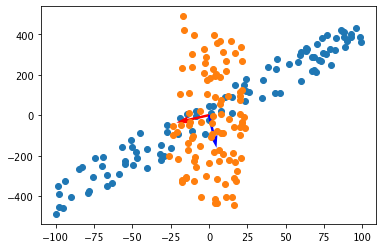

In [27]:
X = generate_noisy_line(4)
_,eig_dec = pca_eig(X)
_,svd_dec = pca_svd(X)
plt.scatter(X[:,0], X[:,1])
print(eig_dec)
print(svd_dec)
origin = [0,0]
eig_vec1, eig_vec2 = eig_dec[0, :], eig_dec[1,:]
plt.quiver(*origin, *eig_vec1, color=['r'], scale=10)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=10)
rec = Z@eig_dec.T
plt.scatter(Z[:,0], Z[:,1])
plt.show()




Let's compare our simple two-line implementations to the sklearn implementation.

In [30]:
# Our basic implementation vs. the sklearn implementation
from sklearn.decomposition import PCA
fitted = PCA().fit(X)
print(fitted.components_)
print(pca_eig(X)[1])
print(pca_svd(X)[1])

[[-0.22291338 -0.97483825]
 [-0.97483825  0.22291338]]
[[-0.97496792 -0.22234558]
 [ 0.22234558 -0.97496792]]
[[-0.22234558 -0.97496792]
 [ 0.97496792 -0.22234558]]


They match, but I still wouldn't rely on ours too much! SkLearn is doing a bunch of stuff behind the scenes to make sure it is always accurate!

In [100]:
df.columns.values

array(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'PCA Component 1', 'PCA Component 2'],
      dtype=object)

In [50]:
df = pd.read_csv("data/country-data.csv")
df.head()
X = df[df.columns[2:]].to_numpy()
_, eigenvectors = pca_svd(X)

(156, 7)


Let's try to project this 7-dimensional country data onto only two.

In [45]:
df.iloc[1]["Country or region"]

'Denmark'

(156, 7)
(7, 2)


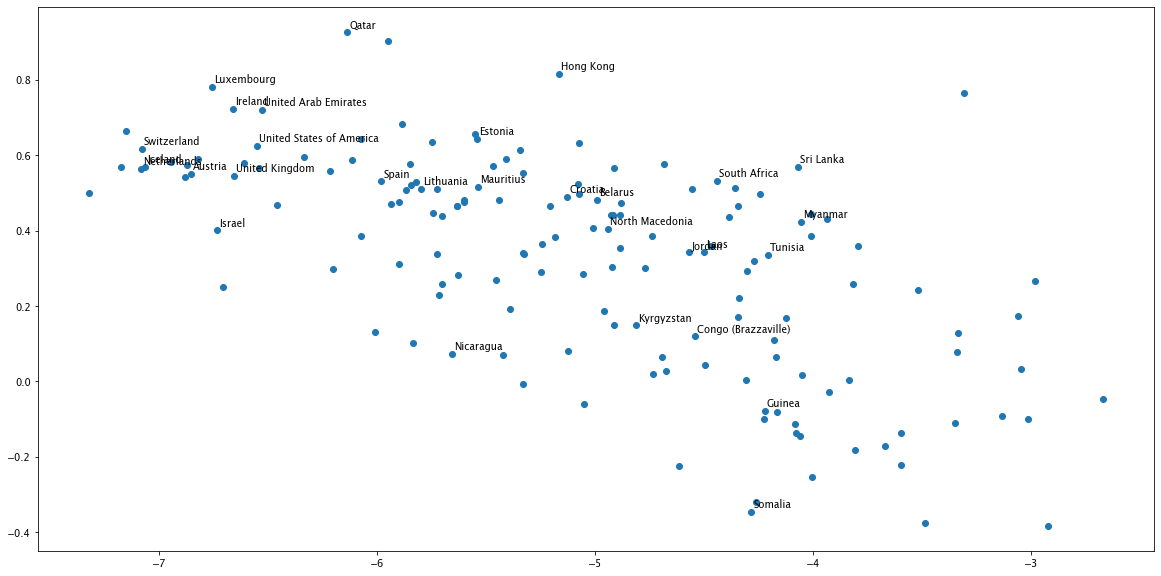

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
projection = eigenvectors[:,:2]
print(X.shape)
print(projection.shape)
projected = X@projection
ax.scatter(projected[:,0], projected[:,1])

idxs = np.arange(len(df))
np.random.shuffle(idxs)
idxs = idxs[:30]

for i in idxs:
    ax.annotate(df.iloc[i]["Country or region"], (projected[i, 0]+0.01, projected[i,1] + 0.01))

In [102]:
df.columns.values[:-2]

array(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], dtype=object)

[](https://en.wikipedia.org/wiki/World_Happiness_Report)

In [104]:
import altair as alt


df["PCA Component 1"] = projected[:,0]
df["PCA Component 2"] = projected[:,1]
cols = df.columns.values[:-2]
points = alt.Chart(df).mark_circle(size=60).encode(
    x='PCA Component 1',
    y='PCA Component 2',
    color='Score',
    tooltip=list(cols)
    
#     text='Country or region'
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7,
    fontSize=8,
    color="#000000",
    fill="#000000"
).encode(
    text='Country or region'
)
(points + text).interactive()

alt.LayerChart(...)

In [145]:
_,_,D_prime = np.linalg.svd(X)
print(D_prim

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


#### Country data

#### Eigenfaces

In [7]:
from PIL import Image
import glob
dims = (40,60)
images = [Image.open(n).convert("L").resize((dims[0], dims[1])) for n in glob.glob('photos/utkcropped/*.jpg')]
imag_arr = np.zeros(shape=(len(images), dims[0]*dims[1]))
for i in range(len(images)):
    imag_arr[i, :] = np.array(images[i]).reshape(1, dims[0]*dims[1])

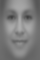

In [8]:
Image.fromarray(np.uint8(np.mean(imag_arr, axis=0)).reshape(dims[1], dims[0]))

In [9]:
w,D_eig = pca_eig(imag_arr)
D_eig

array([[-0.01449769,  0.02432601,  0.01800359, ..., -0.00260456,
        -0.00424974, -0.00322823],
       [-0.01410733,  0.02340599,  0.01990105, ..., -0.00032233,
         0.00464777,  0.00052506],
       [-0.01403792,  0.0218387 ,  0.02165501, ...,  0.00910833,
         0.00449913,  0.00365528],
       ...,
       [-0.0173794 ,  0.03519392, -0.01486302, ..., -0.00027073,
         0.00219523,  0.00076805],
       [-0.01741188,  0.03576593, -0.0135625 , ..., -0.00097625,
         0.00040196, -0.00218996],
       [-0.01748186,  0.03596164, -0.01234977, ..., -0.00168592,
         0.00066804, -0.00050403]])

In [19]:
D = pca_svd(imag_arr)
D

array([[-0.01449769, -0.01410733, -0.01403792, ..., -0.0173794 ,
        -0.01741188, -0.01748186],
       [-0.02432601, -0.02340599, -0.0218387 , ..., -0.03519392,
        -0.03576593, -0.03596164],
       [-0.01800359, -0.01990105, -0.02165501, ...,  0.01486302,
         0.0135625 ,  0.01234977],
       ...,
       [-0.00086966,  0.0020632 , -0.00245972, ..., -0.00085492,
         0.00114599, -0.00073108],
       [ 0.00035981, -0.0011047 , -0.00059414, ..., -0.00120043,
         0.00059203,  0.00046822],
       [ 0.00016873, -0.00179526,  0.00085192, ...,  0.00018934,
        -0.00035576, -0.00010849]])

In [24]:
print(D_eig[:,0])
print(D[0,:])

[-0.01449769 -0.01410733 -0.01403792 ... -0.0173794  -0.01741188
 -0.01748186]
[-0.01449769 -0.01410733 -0.01403792 ... -0.0173794  -0.01741188
 -0.01748186]


[[ 88.92060596  93.27631023  95.87363194 ...  31.08430215  29.72428408
   28.54660583]
 [ 86.8012817   91.35568039  91.69692119 ...  29.16842799  26.34760866
   25.4582613 ]
 [ 83.35164284  86.18368107  84.30657846 ...  29.413407    23.62524834
   21.78888125]
 ...
 [ 83.4864986   69.82595547  79.57138949 ... 131.75926885 163.28162525
  165.78699356]
 [ 70.05196734  64.94589235  82.64574866 ... 137.77306566 165.17164156
  166.24980292]
 [ 61.58285813  62.27797219  84.96066252 ... 141.3498322  164.33868988
  164.59799326]]


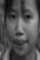

In [25]:
n_c = 400
comps = np.argsort(-1*np.abs(w))[:n_c]
proj = D_eig[:,:n_c]
test_im = imag_arr[0,:]
# rec = ((proj.T@(proj@test_im))+np.mean(imag_arr, axis=0)).reshape((dims[1], dims[0]))
# rec = (proj.T@(proj@test_im)).reshape((dims[1], dims[0]))
rec = (test_im@proj@proj.T).reshape((dims[1], dims[0]))
print(rec)
Image.fromarray(np.uint8(rec))


[[ 88.92060596  93.27631023  95.87363194 ...  31.08430215  29.72428408
   28.54660583]
 [ 86.8012817   91.35568039  91.69692119 ...  29.16842799  26.34760866
   25.4582613 ]
 [ 83.35164284  86.18368107  84.30657846 ...  29.413407    23.62524834
   21.78888125]
 ...
 [ 83.4864986   69.82595547  79.57138949 ... 131.75926885 163.28162525
  165.78699356]
 [ 70.05196734  64.94589235  82.64574866 ... 137.77306566 165.17164156
  166.24980292]
 [ 61.58285813  62.27797219  84.96066252 ... 141.3498322  164.33868988
  164.59799326]]


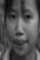

In [9]:
n_c = 400
proj = D[:n_c,:].T
test_im = imag_arr[0,:]
# rec = ((proj.T@(proj@test_im))+np.mean(imag_arr, axis=0)).reshape((dims[1], dims[0]))
# rec = (proj.T@proj@test_im).reshape((dims[1], dims[0]))
rec = (test_im@proj@proj.T).reshape((dims[1], dims[0]))
print(rec)
Image.fromarray(np.uint8(rec))

In [16]:
def scale(arr):
    return 255*(arr-np.min(arr))/(np.max(arr)-np.min(arr))
# Image.fromarray(np.uint8(D[1,:]).reshape(dims[1],dims[0]))
Image.fromarray(np.uint8(scale(D[5,:])).reshape(dims[1],dims[0]))

NameError: name 'D' is not defined

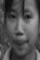

In [493]:
images[0]

In [484]:
rec

array([[ 89.74491079,  86.95773464,  86.23249658, ...,  86.99501061,
         88.67279327,  91.86345398],
       [ 89.34507735,  86.85824678,  86.32769218, ...,  87.08140539,
         88.37546881,  91.49980539],
       [ 89.13006652,  86.73743089,  86.64948763, ...,  87.04110348,
         88.24918279,  91.10020465],
       ...,
       [108.60957089, 108.03186369, 107.32457681, ..., 107.24056852,
        107.98049465, 108.66084029],
       [108.25795716, 107.8602669 , 107.33880091, ..., 107.29614313,
        107.77133696, 108.44592901],
       [107.93513932, 107.51611634, 107.12135627, ..., 107.22319959,
        107.54947842, 108.14727148]])

In [406]:
(proj.T@(test_im@proj)).shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1500 is different from 2400)

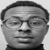

In [206]:
Image.fromarray(np.uint8(imag_arr[3,:].reshape(50,50)))

In [249]:
np.argmax(np.abs(w))

2499

In [503]:
255*D[4,:]

array([  8.60767467,   8.1293819 ,   6.61637366, ..., -10.42399639,
       -10.89898312, -10.99819138])

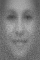

In [444]:
Image.fromarray(np.uint8(np.mean(imag_arr, axis=0) + 255*D[6,:]).reshape(dims[1], dims[0]))

In [65]:
D[:,0]

array([-0.02044449+0.j, -0.01783256+0.j, -0.02044449+0.j, ...,
       -0.02014646+0.j, -0.02038187+0.j, -0.02017757+0.j])